#  BRAIN STROKE PREDICTION

In this notebook we are using a dataset that is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Dataset Information:

healthcare-data-stroke-data.csv: The csv contains data related to patients who may have heart disease and various attributes which determine that :

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Objective :

Visualize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.

# Assumptions : CONTEXT  or BUSINESS UNDERSTANDING

1.Heart with a Heart Disease is prone to Stroke, is it true?

2.Males are most susceptible to strokes due to high work related stress, is it true?

3.Being Married will increase the risk of having a stroke, is it true?

4.HyperTension, is it one of the reason for a stroke?the reason for a stroke?

# Questions to be answered :: DATA UUNDERSTANDING

1.Does age has impact on strokes? and How is this parameter distributed?

2.Is there a difference in the rate of heart stroke for smokers and non smokers?

3.Does gluscose level and bmi contibute to stroke?

# DATA PREPARATION :: lets prepare the data

In [87]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Common model helpers
from sklearn.preprocessing import(LabelEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             confusion_matrix)

# imbalance dataset handling


from imblearn.over_sampling import (SMOTE)
# model algorithams
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
#importing Dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

There are total 5110 rows and 12 columns

In [89]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [90]:
df.tail() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [91]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

id,hypertension,heart_disease,stroke these 4 columns are of datatype int

age,avg_glucose_level,bmi are of datatype float

gender,smoking_status,ever_married,work_type and residence_type are of string type

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


As we can see there few values missing from BMI column,but before handling those missing values lets check the stroke column

In [93]:
# Data spread between people having experienced of a stroke or not

df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

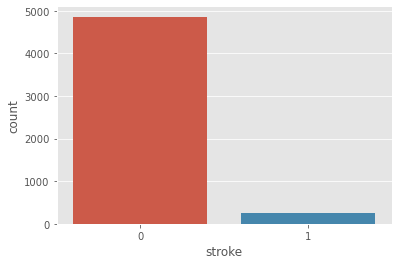

In [94]:
sns.countplot(data=df,x='stroke')
plt.show()

In [95]:
# Percentage of people having had a stroke in this dataset

len(df[df['stroke'] == 1])/len(df)*100

4.87279843444227

The dataset is very imbalanced => important to keep it in mind when cleaning and training, as well as when choosing the metrics.

# Handling Missing values

In [96]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

there are total 201 values missing 

<AxesSubplot:>

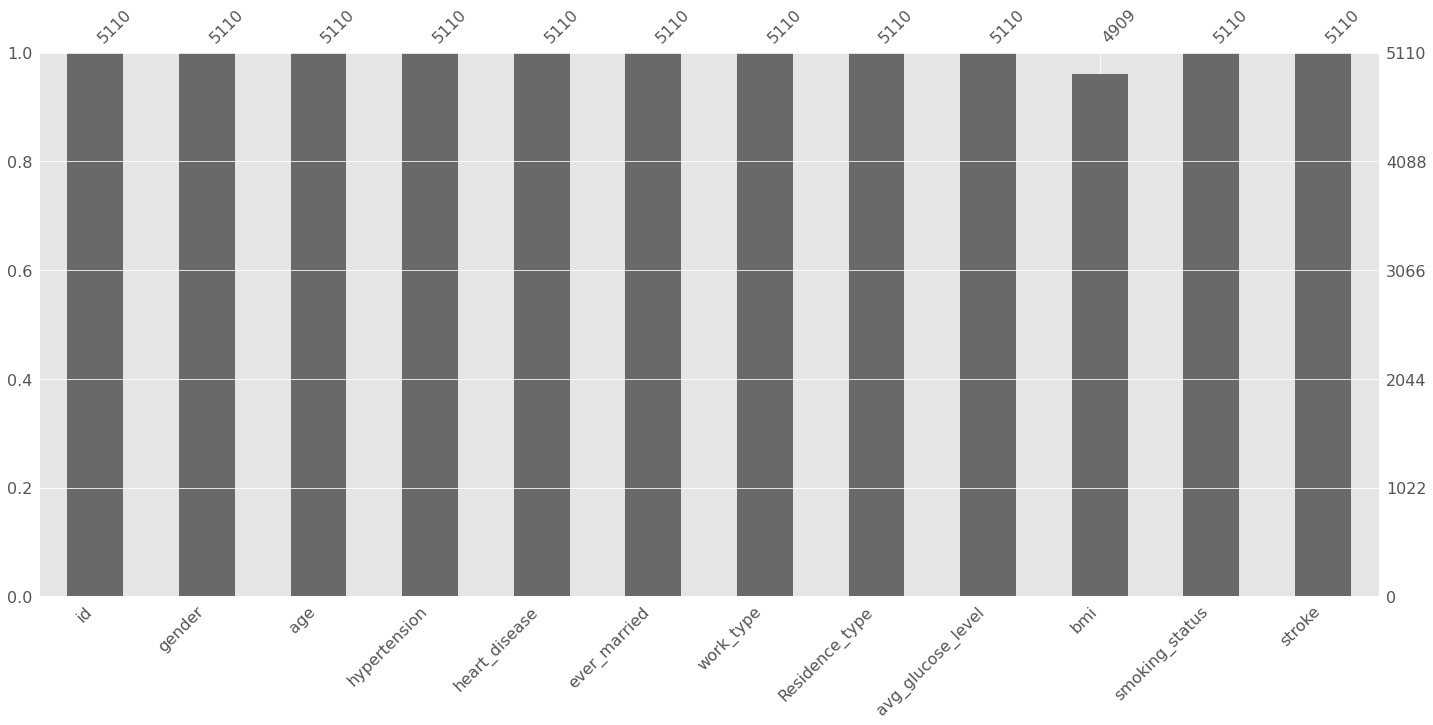

In [97]:
#lets import missingno package
#Missingno is a Python library 
#that provides the ability to understand the distribution of missing values through informative visualizations.
import missingno as msno
#visualizing in barplot
msno.bar(df)

In [98]:
per=df.isnull().sum()/len(df)*100
per

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are total 3.9 percent values are missing lets replace those values with the mean.

In [99]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [100]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Drop the id column:
The ID column was useful to identify the patients but it will not have any impact on the models, so we can drop it.

In [102]:
#Dropping unnecessary columns
df.drop(columns=['id'],inplace=True)

In [103]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


now lets explore all columns

In [104]:
#gender
#Data spread between male and female

df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We have one other row, we can remove it 

In [105]:
df=df.loc[df['gender']!='Other']

In [106]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

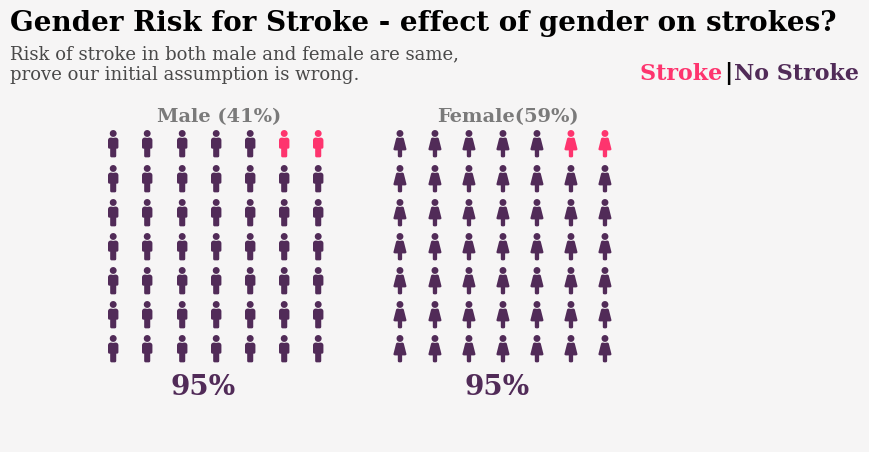

In [107]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()
female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))

from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                               'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()
#this plot is taken from https://www.kaggle.com/aditimulye/stroke-prediction-visualization-prediction

It is interesting to note that although the number of males and females are different in the dataset, but, both of them are at equal risk to heart stroke.
Hence proving that our assumption that males are more susciptible to stroke due to work load, as wrong.
But can we consider it?  because of unbalanced data this is the best we got, let us think about this again after oversampling

<AxesSubplot:title={'center':'  Stroke/Marital Status'}, xlabel='ever_married', ylabel='count'>

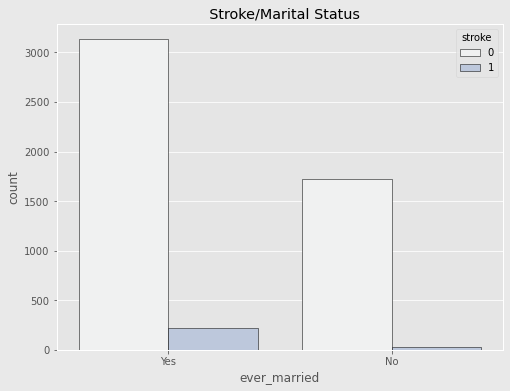

In [108]:
#Marital status
fig=plt.figure(figsize=[8,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("  Stroke/Marital Status")
sns.countplot(data=df, x="ever_married",hue="stroke",edgecolor="black",color="#b8c7e1")

we can see that people who are married are the ones with more number of strokes, but lets check the age column and then confirm.

<AxesSubplot:title={'center':'Age according the marital status classes.'}, xlabel='ever_married', ylabel='age'>

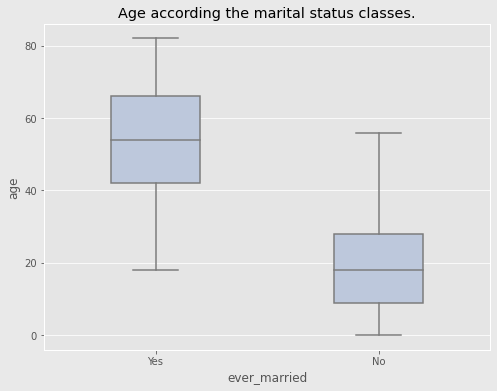

In [109]:
fig=plt.figure(figsize=[8,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Age according the marital status classes.")
sns.boxplot(data=df,y='age',x='ever_married',width=0.4,showfliers=False,color="#b8c7e1")

And we can see that people who are married are mostly between 50-70 age group, now lets consider age column

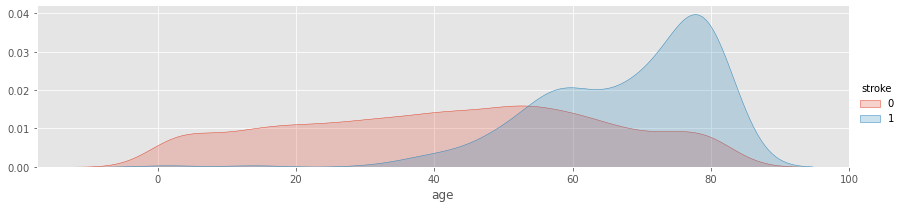

In [110]:
#age
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()
plt.savefig('stroke_age.png')

More brain stroke occred in between 40-90 age group and so married people are more affected

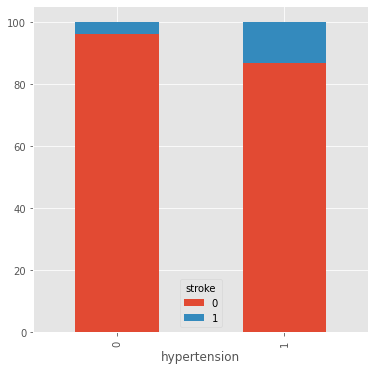

In [111]:
#Visualise proportion of people having heart Disease between the 2 groups

df_hd = df.groupby(['hypertension','stroke'])['hypertension'].count()
df_hd_total = df.groupby(['hypertension'])['hypertension'].count()
df_hd_fig = df_hd / df_hd_total * 100
df_hd_fig = df_hd_fig.unstack()
df_hd_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_heart_Disease.png')

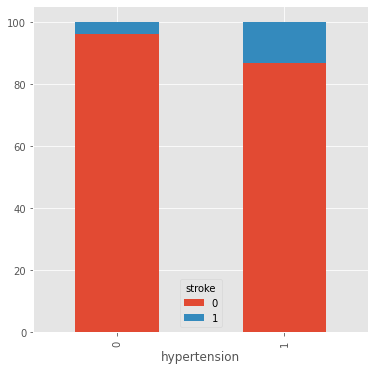

In [112]:
#Visualise proportion of people having hypertension between the 2 groups

df_hypertension = df.groupby(['hypertension','stroke'])['hypertension'].count()
df_hypertension_total = df.groupby(['hypertension'])['hypertension'].count()
df_hypertension_fig = df_hypertension / df_hypertension_total * 100
df_hypertension_fig = df_hypertension_fig.unstack()
df_hypertension_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_hypertension.png')

as we can see here both hyper tension and heart disease columns are having more number of stroke cases 
so it is evident that people with hyper tension and heart disease are the ones with higer risk of getting a stroke

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 639.0+ KB


In [114]:
#work_type
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

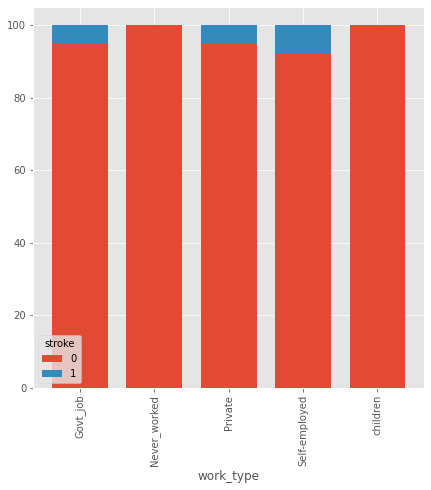

In [115]:
df_work = df.groupby(['work_type','stroke'])['work_type'].count()
df_work_total = df.groupby(['work_type'])['work_type'].count()
df_work_fig = df_work / df_work_total * 100
df_work_fig = df_work_fig.unstack()
df_work_fig.plot.bar(stacked=True, figsize=(7,7), width=0.75)
plt.savefig('stroke_work.png')

So here we can see that no mtr what job they are doing, work_type do have a impact on stroke 

<AxesSubplot:title={'center':'  Stroke/Residence'}, xlabel='stroke', ylabel='count'>

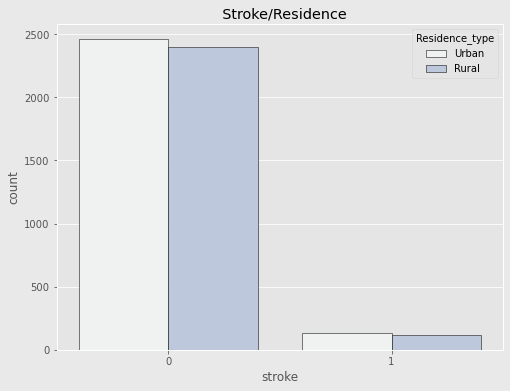

In [116]:
#residence type
fig=plt.figure(figsize=[8,6])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("  Stroke/Residence")
sns.countplot(data=df, x="stroke",hue="Residence_type",edgecolor="black",color="#b8c7e1")

Environmental factors can be a risk factor for stroke but there is no difference in this dataset.

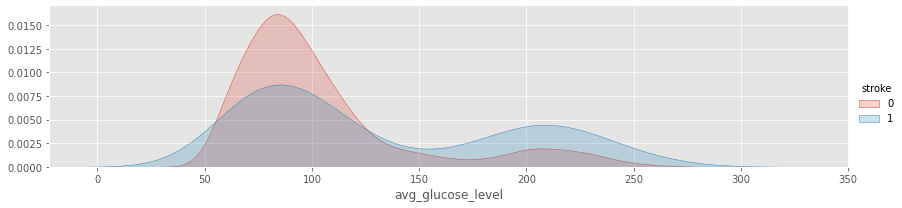

In [117]:
#glucose level
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "avg_glucose_level", shade=True)
fig.add_legend()

The average glucose level above 150 where more people is experiencing stroke.

In [118]:
#BMI
bmi=list(df['bmi'].values)
hist_data=[bmi]
group_lables=['bmi']
colour=['Red']
fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()

Due to outliers histplot is right skewed

Either the outliers can be removed or the distribution curve can be made less-skewed by mapping the values with a log but both cases will lead to loss of the number of datapoints with Stroke = 1

In [119]:
#removing outliers
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape after removing the BMI outliers :  (4992, 11)


In [120]:
bmi=list(df['bmi'].values)
hist_data=[bmi]
group_lables=['bmi']
colour=['Red']
fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()

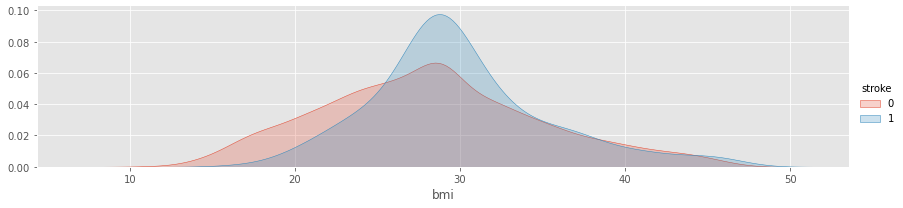

In [121]:
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()
plt.savefig('stroke_bmi.png')

mostly overwieghted people have moew risk of getting a stroke

In [122]:
#smoking_status 
df['smoking_status'].value_counts()

never smoked       1840
Unknown            1519
formerly smoked     861
smokes              772
Name: smoking_status, dtype: int64

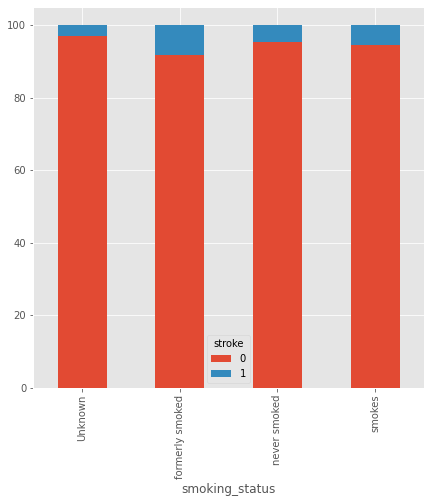

In [123]:
df_smoking = df.groupby(['smoking_status','stroke'])['smoking_status'].count()
df_smoking_total = df.groupby(['smoking_status'])['smoking_status'].count()
df_smoking_fig = df_smoking / df_smoking_total * 100
df_smoking_fig = df_smoking_fig.unstack()
df_smoking_fig.plot.bar(stacked=True, figsize=(7,7), width=0.5)
plt.savefig('stroke_smoking.png')

The graph confirms that smoking is a risk factor for stroke.

# Encoding categorical data

In [124]:
#converting categorical columns into numericals
labelencoder=LabelEncoder()
df['gender']=labelencoder.fit_transform(df['gender'])
df['ever_married']=labelencoder.fit_transform(df['ever_married'])
df['Residence_type']=labelencoder.fit_transform(df['Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [125]:
# Encode variables with more than 2 Classes

df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4992 non-null   int32  
 1   age                             4992 non-null   float64
 2   hypertension                    4992 non-null   int64  
 3   heart_disease                   4992 non-null   int64  
 4   ever_married                    4992 non-null   int32  
 5   Residence_type                  4992 non-null   int32  
 6   avg_glucose_level               4992 non-null   float64
 7   bmi                             4992 non-null   float64
 8   stroke                          4992 non-null   int64  
 9   work_type_Never_worked          4992 non-null   uint8  
 10  work_type_Private               4992 non-null   uint8  
 11  work_type_Self-employed         4992 non-null   uint8  
 12  work_type_children              49

# Further exploratory analysis and visualisation

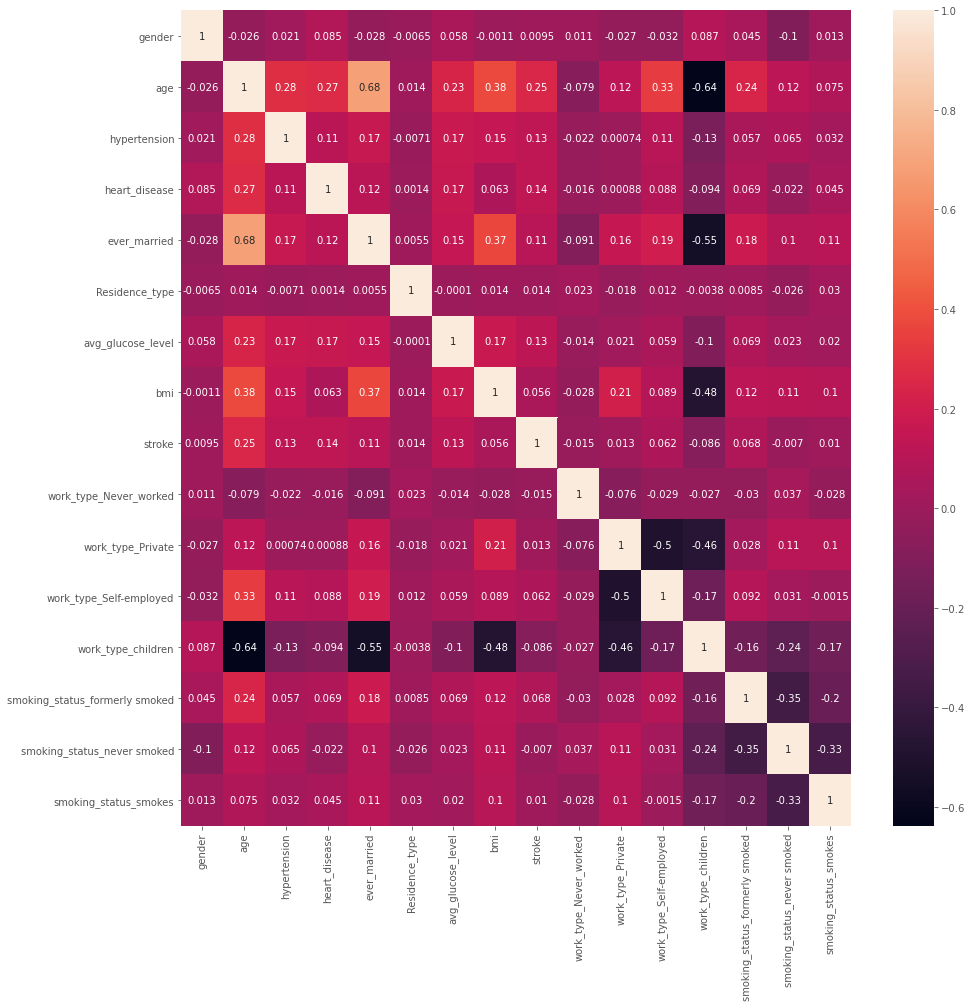

In [127]:
#correlation between columns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.savefig('stroke_corr_heat.png')

columns age,hear_disease,hypertension,glucose_level are having positive correlation wrt stroke

# Splitting Train and Test data

In [128]:
X=df.drop('stroke', axis=1)
y=df['stroke'].ravel()

In [129]:
#Scaling X 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

# Implementing models 

In [134]:
#Logistic Regression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [135]:
accuracy_score(y_test,y_pred_lr)

0.9506008010680908

In [136]:
print(confusion_matrix(y_pred_lr, y_test))

[[1424   74]
 [   0    0]]


In [137]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))

[[1424   73]
 [   0    1]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1497
           1       0.01      1.00      0.03         1

    accuracy                           0.95      1498
   macro avg       0.51      0.98      0.50      1498
weighted avg       1.00      0.95      0.97      1498



With imbalanced data, the accuracy is not a metric that we can take into account because it is based on the the larger part of the target. In other words, this model is very accurate predincting when a people is not having a stroke, which is obviously what we don't need...

The poor result in class 1 of the target is expected because of the imbalanced dataset as well as the limited correlation among the variables.

so lets make our imbalanced dataset into a balanced dataset

# Balancing our dataset

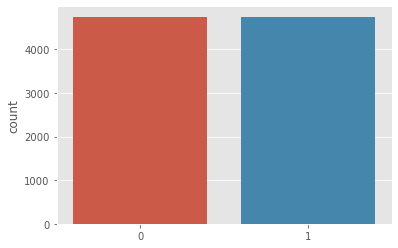

In [138]:
#Using over-sampling method

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, y)

sns.countplot(x = y_oversampled, data = df)
plt.savefig('stroke_oversampled.png')

# Splitting again with Balanced Data

In [139]:
# Train again with the new data

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.2, random_state = 42)

# Applying Models on Balanced data

In [140]:
#Logistic Regression
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [141]:
accuracy_score(y_test,y_pred_lr)

0.8572933122696156

In [142]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       958
           1       0.85      0.87      0.86       941

    accuracy                           0.86      1899
   macro avg       0.86      0.86      0.86      1899
weighted avg       0.86      0.86      0.86      1899



In [143]:
print(confusion_matrix(y_pred_lr, y_test))

[[808 121]
 [150 820]]


In [144]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(confusion_matrix(dt_pred, y_test))
print(classification_report(dt_pred, y_test))

[[843  62]
 [115 879]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       905
           1       0.93      0.88      0.91       994

    accuracy                           0.91      1899
   macro avg       0.91      0.91      0.91      1899
weighted avg       0.91      0.91      0.91      1899



In [145]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

[[753  27]
 [205 914]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       780
           1       0.97      0.82      0.89      1119

    accuracy                           0.88      1899
   macro avg       0.88      0.89      0.88      1899
weighted avg       0.90      0.88      0.88      1899



In [146]:
#Random forest
rft = RandomForestClassifier(random_state=42)
rft.fit(X_train, y_train)
rft_pred = rft.predict(X_test)
print(confusion_matrix(rft_pred, y_test))
print(classification_report(rft_pred, y_test))

[[889  38]
 [ 69 903]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       927
           1       0.96      0.93      0.94       972

    accuracy                           0.94      1899
   macro avg       0.94      0.94      0.94      1899
weighted avg       0.94      0.94      0.94      1899



So here we can see that the confusion matrix before balancing is

[[1424   73

[   0    1]]

and after balancing is 

[[889  38]

 [ 69 903]]


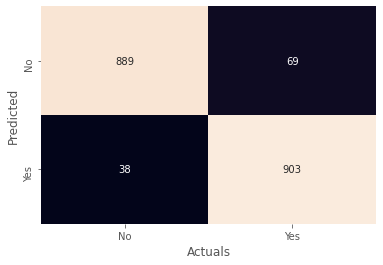

In [150]:
conf_mat = confusion_matrix(rft_pred, y_test)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.savefig('stroke_over_rf_cm.png')

In [153]:
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = dt.predict_proba(X_test)
pred_prob3 = knn.predict_proba(X_test)
pred_prob4 = rft.predict_proba(X_test)

In [154]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1)
print(auc_score2)
print(auc_score3)
print(auc_score4)

0.9352152797960682
0.9070354462338515
0.94282833302643
0.9875815050395018


After sampling, random forest leads to the best results in terms of metrics as we can see with the auc score of .99

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4992 non-null   int32  
 1   age                             4992 non-null   float64
 2   hypertension                    4992 non-null   int64  
 3   heart_disease                   4992 non-null   int64  
 4   ever_married                    4992 non-null   int32  
 5   Residence_type                  4992 non-null   int32  
 6   avg_glucose_level               4992 non-null   float64
 7   bmi                             4992 non-null   float64
 8   stroke                          4992 non-null   int64  
 9   work_type_Never_worked          4992 non-null   uint8  
 10  work_type_Private               4992 non-null   uint8  
 11  work_type_Self-employed         4992 non-null   uint8  
 12  work_type_children              49

**Now lets recheck our assumptions and questions with visualization on new data**

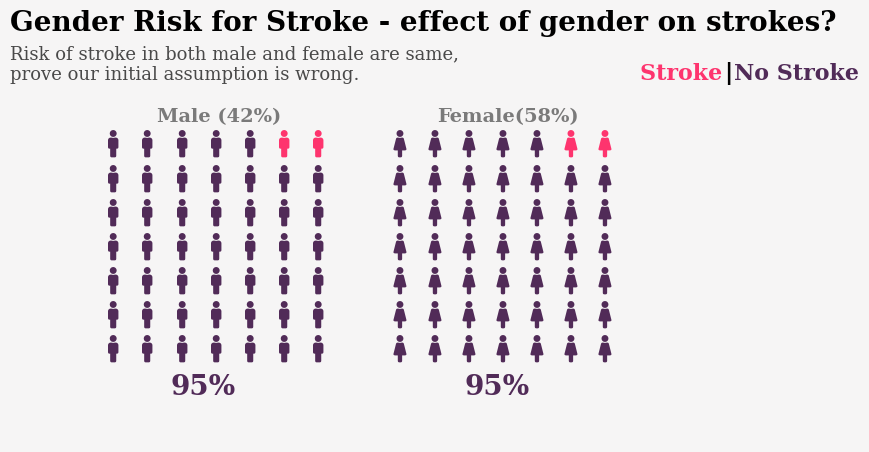

In [155]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()
female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))

from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                               'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()
#this plot is taken from https://www.kaggle.com/aditimulye/stroke-prediction-visualization-prediction

Males are most susceptible to strokes due to high work related stress, is it true?

Answers:

Males and Females both are equally effected 

Heart with a Heart Disease is prone to Stroke, is it true?

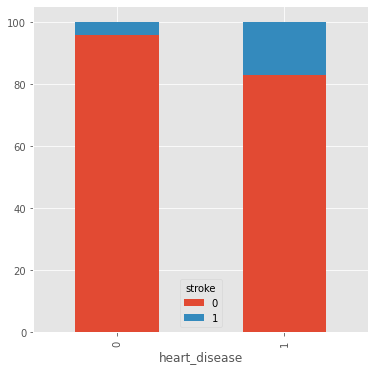

In [157]:
df_heart = df.groupby(['heart_disease','stroke'])['heart_disease'].count()
df_heart_total = df.groupby(['heart_disease'])['heart_disease'].count()
df_heart_fig = df_heart / df_heart_total * 100
df_heart_fig = df_heart_fig.unstack()
df_heart_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_heart.png')


Yes heart with heart disease is prone to stroke

Being Married will increase the risk of having a stroke, is it true?

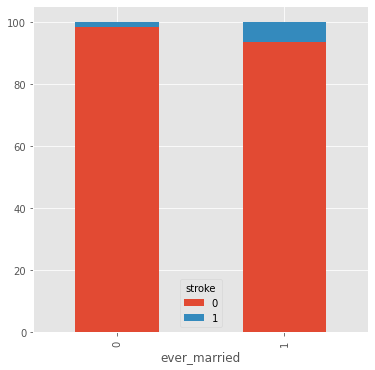

In [160]:
df_married = df.groupby(['ever_married','stroke'])['ever_married'].count()
df_married_total = df.groupby(['ever_married'])['ever_married'].count()
df_married_fig = df_married / df_married_total * 100
df_married_fig = df_married_fig.unstack()
df_married_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_married.png')

Ironic but its evident that being married is also one of the reason for stroke

HyperTension, is it one of the reason for a stroke?

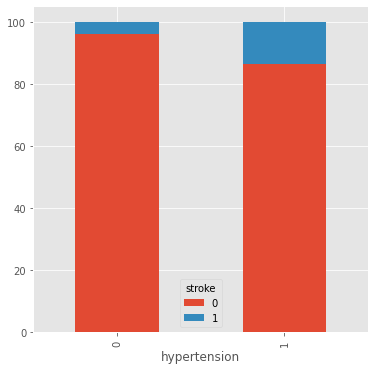

In [162]:
df_hypertension = df.groupby(['hypertension','stroke'])['hypertension'].count()
df_hypertension_total = df.groupby(['hypertension'])['hypertension'].count()
df_hypertension_fig = df_hypertension / df_hypertension_total * 100
df_hypertension_fig = df_hypertension_fig.unstack()
df_hypertension_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_hypertension.png')

Hypertension is a reason for stroke

Does age has impact on strokes? and How is this parameter distributed?

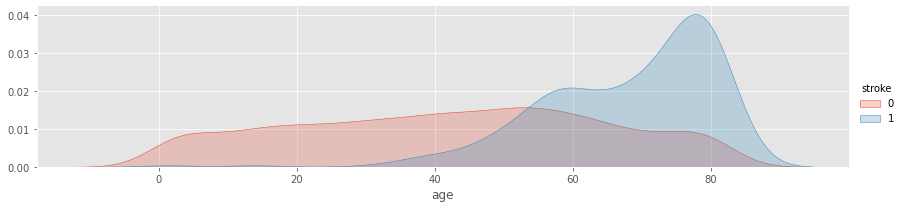

In [163]:
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()
plt.savefig('stroke_age.png')

yes Age is the main aspect in most of the brain stroke cases

Is there a difference in the rate of heart stroke for smokers and non smokers?

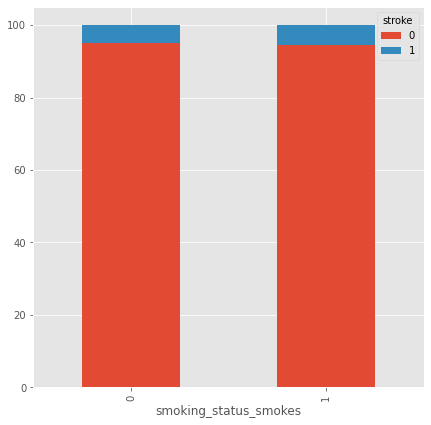

In [164]:
df_smoking = df.groupby(['smoking_status_smokes','stroke'])['smoking_status_smokes'].count()
df_smoking_total = df.groupby(['smoking_status_smokes'])['smoking_status_smokes'].count()
df_smoking_fig = df_smoking / df_smoking_total * 100
df_smoking_fig = df_smoking_fig.unstack()
df_smoking_fig.plot.bar(stacked=True, figsize=(7,7), width=0.5)
plt.savefig('stroke_smoking.png')

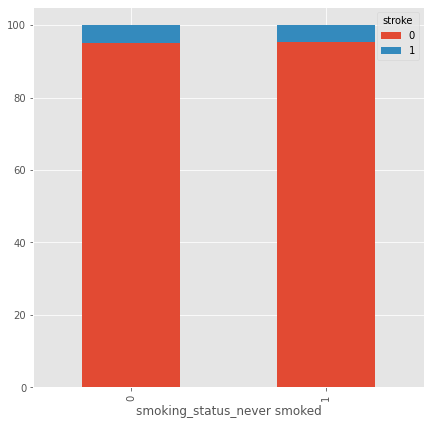

In [167]:
df_smoking = df.groupby(['smoking_status_never smoked','stroke'])['smoking_status_never smoked'].count()
df_smoking_total = df.groupby(['smoking_status_never smoked'])['smoking_status_never smoked'].count()
df_smoking_fig = df_smoking / df_smoking_total * 100
df_smoking_fig = df_smoking_fig.unstack()
df_smoking_fig.plot.bar(stacked=True, figsize=(7,7), width=0.5)
plt.savefig('stroke_nonsmoking.png')

There is no difference between people who smoke and who dont.

Does avg glucose level and bmi contibute to stroke?

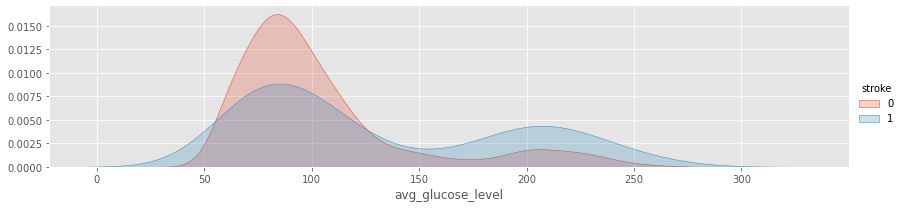

In [177]:
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "avg_glucose_level", shade=True)
fig.add_legend()

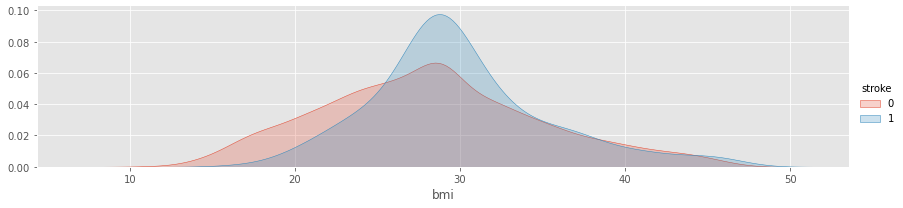

In [178]:
fig = sns.FacetGrid(data=df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()
plt.savefig('stroke_bmi.png')

Yes avg_glusoce_level and bmi both are risk factors for a brain stroke